In [3]:
from basic_op_jup import *
from I_O_manage import *
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cdo import Cdo

cdo=Cdo()

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

In [4]:
dataset, dataset_names = input_interface('I_O.json')

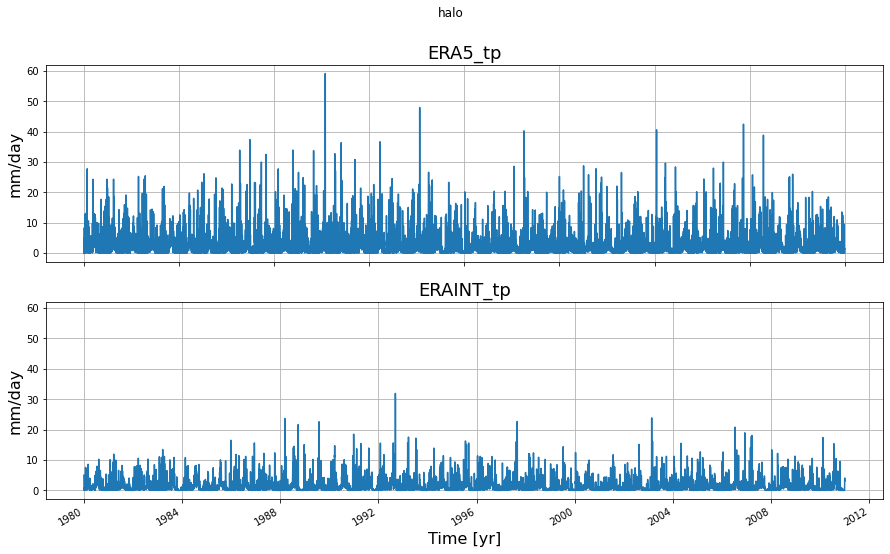

In [5]:
time_serie = dataset.mean(['lat','lon'])

f, axs = plt.subplots(len(dataset_names),  figsize=(15, 4*len(dataset_names)), sharey=True)
plt.suptitle('halo')

for i in np.arange(0,len(dataset_names),1):

    getattr(time_serie, dataset_names[i]).plot(ax = axs[i], hue= "lat")

    axs[i].set_ylabel(getattr(dataset, dataset_names[i]).attrs['units'], fontsize=16)
    axs[i].set_xlabel('Time [yr]', fontsize=16)

    axs[i].set_title(dataset_names[i], fontsize=18)
    
    axs[i].grid()
    if i != len(dataset_names)-1:
        axs[i].tick_params(labelbottom=False)
        axs[i].set(xlabel = '') 

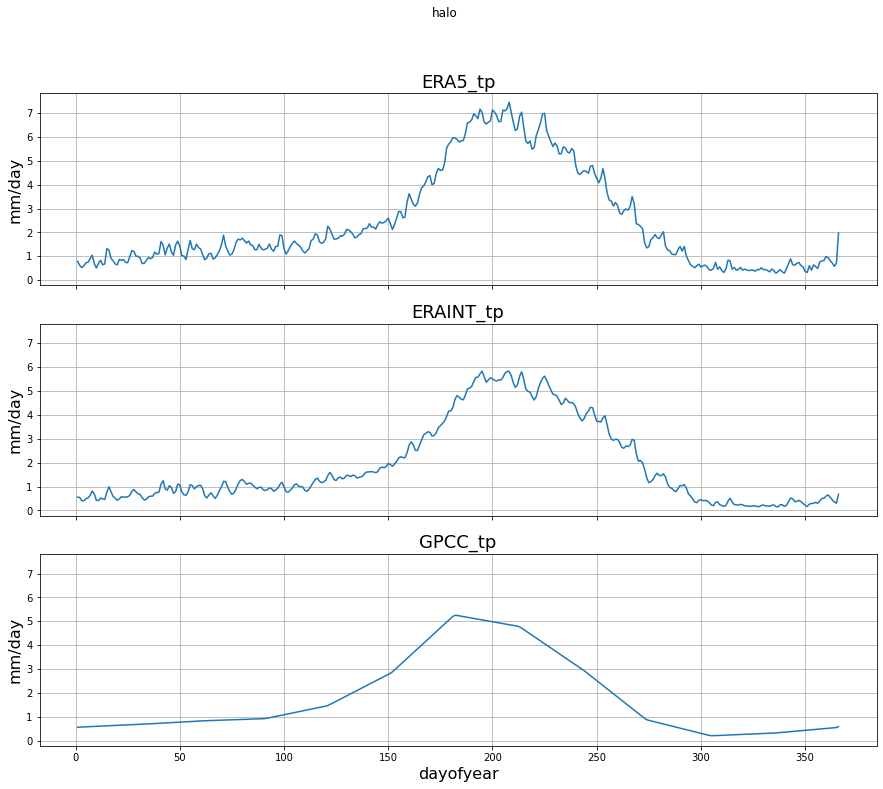

In [8]:
day_serie = dataset.groupby('time.dayofyear').mean().mean(['lat','lon'])

f, axs = plt.subplots(len(dataset_names),  figsize=(15, 4*len(dataset_names)), sharey=True)
plt.suptitle('halo')

for i in np.arange(0,len(dataset_names),1):

    getattr(day_serie, dataset_names[i]).plot(ax = axs[i], hue= "lat")

    axs[i].set_ylabel(getattr(dataset, dataset_names[i]).attrs['units'], fontsize=16)
    axs[i].set_xlabel('dayofyear', fontsize=16)

    axs[i].set_title(dataset_names[i], fontsize=18)
    
    axs[i].grid()
    if i != len(dataset_names)-1:
        axs[i].tick_params(labelbottom=False)
        axs[i].set(xlabel = '') 

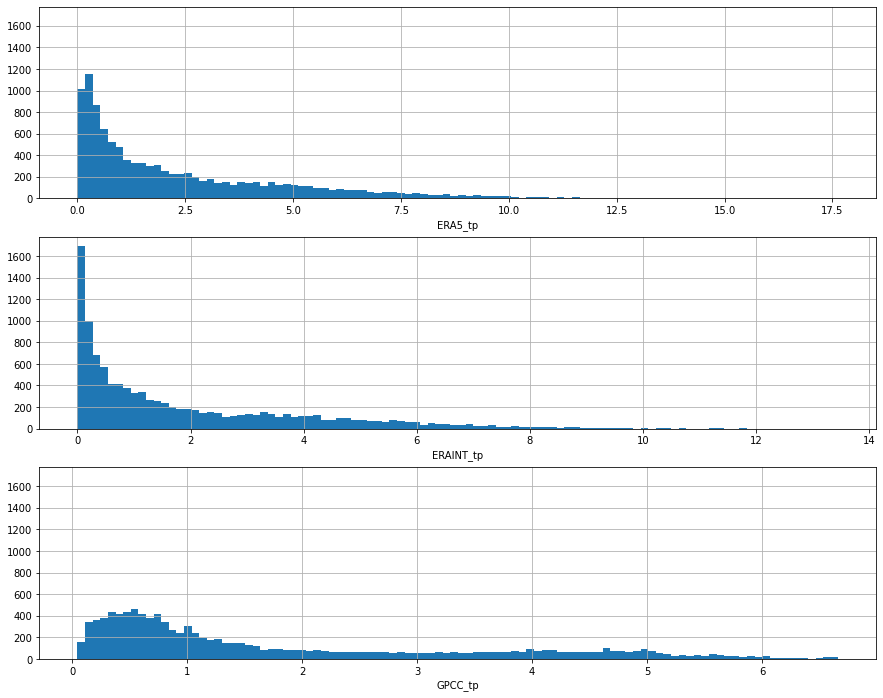

In [9]:
f, axs = plt.subplots(len(dataset_names),  figsize=(15, 4*len(dataset_names)), sharey=True)

for i in np.arange(0,len(dataset_names),1):

    getattr(time_serie, dataset_names[i]).plot.hist(ax = axs[i], bins = 100)
    axs[i].grid()

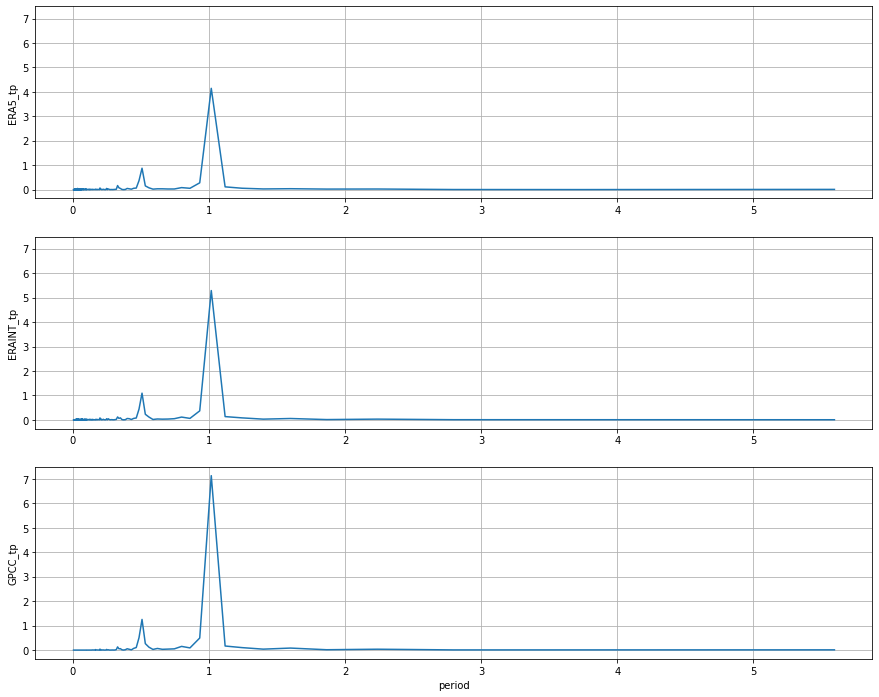

In [10]:
fg = []

dummy, period, dummy = periodogram_custom(getattr(time_serie, dataset_names[0]).to_numpy(), 365, 2048, False)

f, axs = plt.subplots(len(dataset_names),  figsize=(15, 4*len(dataset_names)), sharey=True)

for i in np.arange(0,len(dataset_names),1):

    supp = getattr(time_serie, dataset_names[i]).to_numpy()

    Pxx, period, f = periodogram_custom(supp, 366, 4096, False)

    axs[i].plot(period, Pxx)
    axs[i].grid()
    axs[i].set(ylabel = dataset_names[i])

    if i == len(dataset_names)-1:

        axs[i].set(xlabel = 'period')


